In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track,
                             )

In [2]:
# path_save = "D:/OneDrive - University of Warwick/06-KineticAnalysisMounia/4-Figures"
path_save = "/home/u2175049/Documents/Code/KineticAnalysis/notebook/figures/"

In [3]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

# Explanation

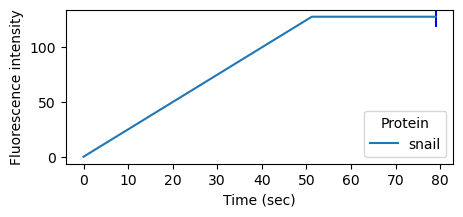

In [83]:
# Translation profil for different protein with same translation rate

translation_rate = 15 #(aa/s)
suntag_appearance = 24

fluo_max_ref = 32  # default intensity if 1 fluo == 1 suntag
fluo_max = 128

fig, ax = plt.subplots()


prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance * x * fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max

ax.plot(x, y, label="snail")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="blue")

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Fluorescence intensity")
plt.legend(loc="lower right")
ax.get_legend().set_title("Protein")
fig.set_size_inches((5, 2))
# fig.savefig(os.path.join(path_save, "one_prot_profile.eps"), dpi=300)





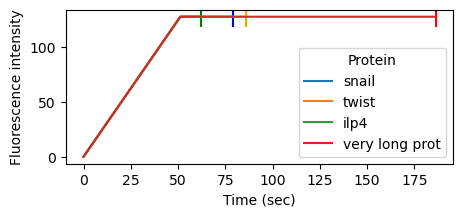

In [8]:
# Translation profil for different protein with same translation rate

translation_rate = 15 #(aa/s)
suntag_appearance = 24

fluo_max_ref = 32  # default intensity if 1 fluo == 1 suntag
fluo_max = 128

fig, ax = plt.subplots()


prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="snail")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="blue")

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["twist"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="twist")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="orange")

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["ilp4"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="ilp4")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="green")



prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["very_long_prot"]
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label="very long prot")
ax.scatter(x[-1], y[-1], marker="|", s=200., color="red")



ax.set_xlabel("Time (sec)")
ax.set_ylabel("Fluorescence intensity")
plt.legend(loc="lower right")
ax.get_legend().set_title("Protein")
fig.set_size_inches((5, 2))
# fig.savefig(os.path.join(path_save, "several_prot_profile.eps"), dpi=300)

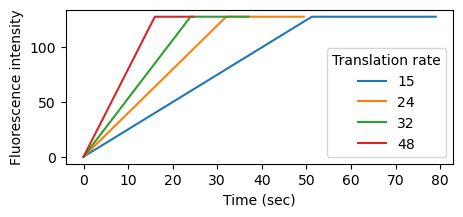

In [9]:
# Translation profil for one protein with different 

prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
suntag_appearance = 24

fluo_max_ref = 32  # default intensity if 1 fluo == 1 suntag
fluo_max = 128

fig, ax = plt.subplots()

translation_rate = 15 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 24 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 32 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

translation_rate = 48 #(aa/s)
x = np.arange(prot_length/translation_rate, step=0.1)
y = translation_rate/suntag_appearance*x* fluo_max/fluo_max_ref
y[y>fluo_max]=fluo_max
ax.plot(x, y, label=translation_rate)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Fluorescence intensity")
plt.legend(loc="lower right")
ax.get_legend().set_title("Translation rate")
fig.set_size_inches((5, 2))
# fig.savefig(os.path.join(path_save, "one_prot_profile_speed.eps"), dpi=300)

In [80]:
x_global, y_global, y_start_prot = generate_track(prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"], 
                                                  suntag_appearance=24, 
                                                  fluo_max_ref=32, 
                                                  fluo_max=128, 
                                                  translation_rate=24, 
                                                  binding_rate=0.05,
                                                  step = 0.1,
                                                 length=36000)

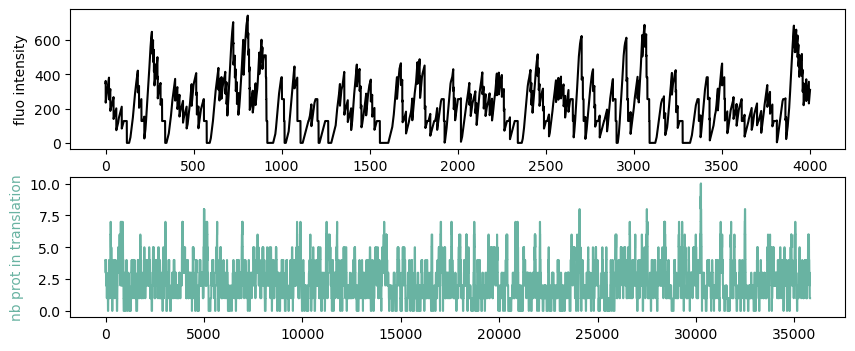

In [81]:
fig, axes = plt.subplots(2,1)
axes[0].plot(x_global[:40000], y_global[:40000], color="black")
axes[0].set_xlabel("Time (sec)")
axes[0].set_ylabel("fluo intensity")


axes[1].plot(x_global, y_start_prot, color="#69b3a2")
axes[1].set_ylabel("nb prot in translation", color="#69b3a2")
fig.set_size_inches((10, 4))
# fig.savefig(os.path.join(path_save, "intensity_profile.eps"), dpi=300)

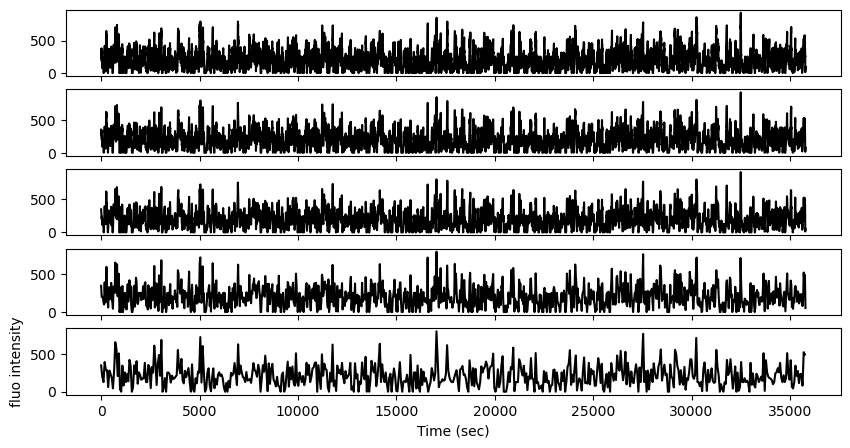

In [82]:
fig, axes = plt.subplots(5,1, sharex=True)
axes[0].plot(x_global, y_global, color="black")

axes[1].plot(x_global[::50], y_global[::50], color="black")

axes[2].plot(x_global[::100], y_global[::100], color="black")

axes[3].plot(x_global[::300], y_global[::300], color="black")

axes[4].plot(x_global[::600], y_global[::600], color="black")
axes[4].set_xlabel("Time (sec)")
axes[4].set_ylabel("fluo intensity")

fig.set_size_inches((10, 5))
# fig.savefig(os.path.join(path_save, "intensity_profile_dt_all.eps"), dpi=300)

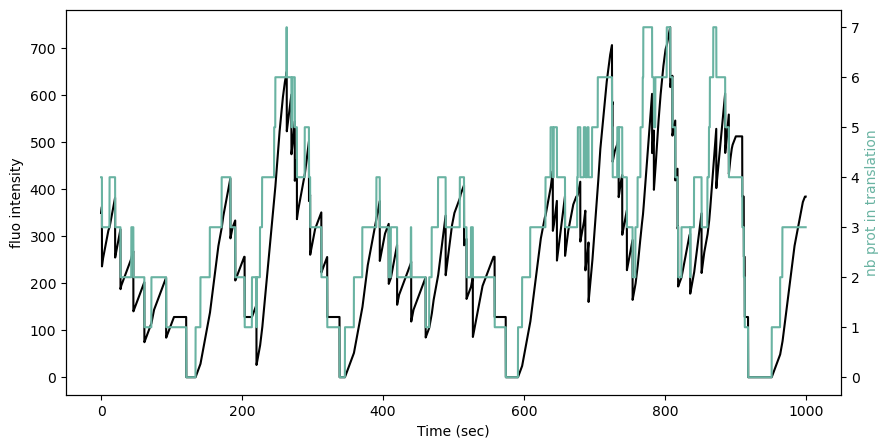

In [83]:
fig, ax = plt.subplots(1,1)
ax.plot(x_global[:10000], y_global[:10000], color="black")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("fluo intensity")

ax2 = ax.twinx()
ax2.plot(x_global[:10000], y_start_prot[:10000], color="#69b3a2")
ax2.set_ylabel("nb prot in translation", color="#69b3a2")
fig.set_size_inches((10,5))

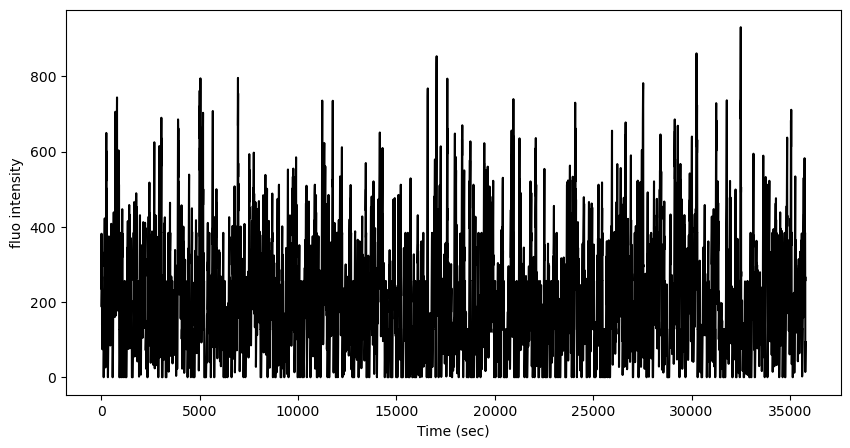

In [84]:
xx = x_global
yy = y_global
ys = y_start_prot

delta_t = 1 # 3sec
fig, ax = plt.subplots(1,1)
ax.plot(xx[::delta_t], yy[::delta_t], color="black")
ax.set_xlabel("Time (sec)")
ax.set_ylabel("fluo intensity")

# ax2 = ax.twinx()
# ax2.plot(xx[::delta_t], ys[::delta_t], color="#69b3a2")
# ax2.set_ylabel("nb prot in translation", color="#69b3a2")
fig.set_size_inches((10,5))

In [85]:
delta_t = 1
print(xx[::delta_t])
datas = pd.DataFrame({"FRAME":xx[::delta_t],
                      "MEAN_INTENSITY_CH1":yy[::delta_t],
                      "TRACK_ID" : 1
                     })

[0.00000e+00 1.00000e-01 2.00000e-01 ... 3.57997e+04 3.57998e+04
 3.57999e+04]


In [86]:
(x, 
y, 
x_auto, 
y_auto, 
elongation_r, 
translation_init_r,
perr) = single_track_analysis(datas, 
                             1, 
                             delta_t = delta_t*0.1,
                             protein_size=prot_length,
                             normalise_intensity=1,
                             normalize_auto=True,
                             mm=None,
                             lowpass_=False,
                             cutoff=100,
                             rtol=1e-1,
                             method="linear",
                             force_analysis=True,
                             first_dot=True)
print(elongation_r, translation_init_r)

to fix
linear method
6.219192448872574 0.02916418474291163


In [87]:
(x, 
y, 
x_auto_o, 
y_auto_o, 
elongation_r_o, 
translation_init_r_o,
perr_o) = single_track_analysis(datas, 
                             1, 
                             delta_t = delta_t*0.1,
                             protein_size=prot_length,
                             normalise_intensity=1,
                             normalize_auto=True,
                             mm=None,
                             lowpass_=False,
                             cutoff=100,
                             rtol=1e-1,
                             method="original",
                             force_analysis=True,
                             first_dot=True)
print(elongation_r_o, translation_init_r_o)

to fix
original method
31.171197433762902 0.05291107394450361


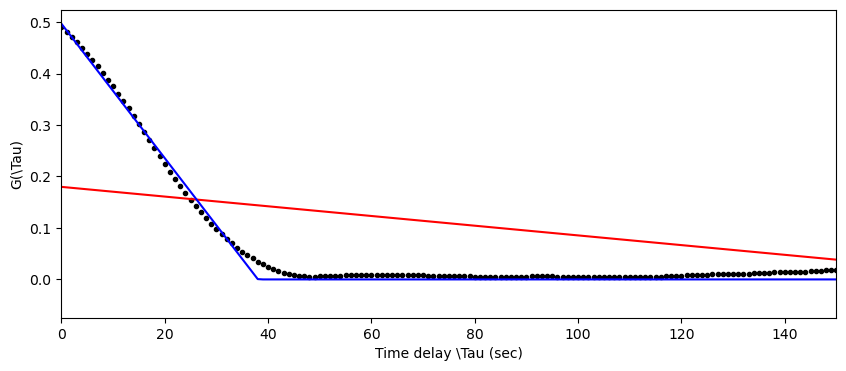

In [88]:
fig, ax = plt.subplots()

ax.plot(x_auto[:int(len(x_auto)/2)][::10], 
        y_auto[:int(len(x_auto)/2)][::10], 
        ".", color="k")

ax.plot(x_auto[:int(len(x_auto)/2)][::10], 
        fit_function(x_auto, prot_length/elongation_r, translation_init_r)[:int(len(x_auto)/2)][::10],
        c="red")

ax.plot(x_auto_o[:int(len(x_auto_o)/2)][::10], 
        fit_function(x_auto_o, prot_length/elongation_r_o, translation_init_r_o)[:int(len(x_auto)/2)][::10], 
        c="blue")
# ax.hlines(1.96/np.sqrt(len(yy)), 0, max(x_auto)/2,'gray','--')
# ax.hlines(-1.96/np.sqrt(len(yy)), 0, max(x_auto)/2,'gray','--')
ax.set_xlabel("Time delay \Tau (sec)")
ax.set_ylabel("G(\Tau)")

ax.set_xlim(0,150)
# ax.set_ylim(-0.10,0.2)

fig.set_size_inches((10, 4))
fig.savefig(os.path.join(path_save, "fit.eps"), dpi=300)

In [91]:
ysign = np.sign(np.array(y_auto))
signchange = ((np.roll(ysign, 1) - ysign) != 0).astype(int)
signchange[0] = 0
t = np.where(signchange == 1)[0][0]
t

1907

In [92]:
ysign = np.sign(np.array(np.diff(y_auto)))
signchange = ((np.roll(ysign, 1) - ysign) != 0).astype(int)
signchange[0] = 0
t = np.where(signchange == 1)[0][0]
t

483

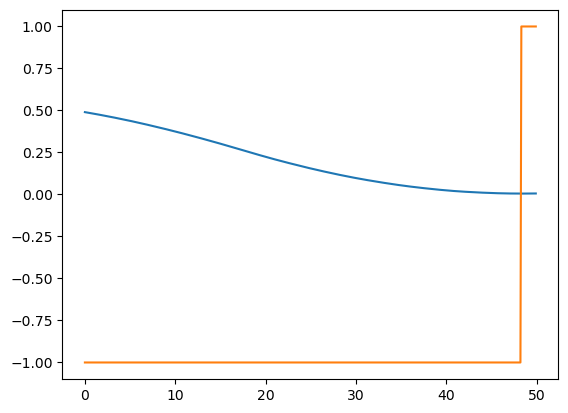

In [95]:
fig, ax = plt.subplots()
ax.plot(x_auto[:500], y_auto[:500])
ax.plot(x_auto[:500], ysign[:500])